In [15]:
import subprocess
import random

size_db=[100,200,400,800,1600,3200,6400,12800,25600]

# Generation of the database instance

In [16]:
def generate_database(i,q,c,t):
    j=i*1000
    nbr=0
    db=""
    while(nbr<t):
        if(q==0):
            db=db+f'p({j},{j+2},{j+3}). s({j+2},0). r({j+3},{j+4},c).\n p({j},{j+4},{j+3}). s({j+4},0). \n'
            nbr=nbr+2
            if(not c):
                tmp=random.randint(1,3)
                if(tmp==1):
                    db=db+f'p({j},{j+3},{j+3}).\n'
                elif(tmp==2):
                    db=db+f'p({j},{j+2},{j+2}).\n'
                elif(tmp==3):
                    db=db+f'r({j+3},{j+3},d).\n'
                
        else:
            db=db+f'p({j},{j},{j},c). p({j},{j+1},{j+1},a). p({j+2},{j},{j+2},d). p({j+3},{j+3},{j},c).\n'
            nbr=nbr+4
            if(not c):
                db=db+f'p({j+3},{j+3},{j},d).\n'
                
        j=j+10
            
    return db

# Test for certainty(q0)
## "yes"-instance

In [17]:
i=0
q0_datalog=[]
q0_gac=[]
while(i<9):
    line=generate_database(i,0,True,size_db[i])
    
    f = open("q0.db", "w")
    f.write(line)
    f.close()
    
    j=0
    list_d=[]
    list_gac=[]
    while(j<5):
        result = subprocess.run(['clingo','q0.db','certainty_q0.lp'], stdout=subprocess.PIPE, universal_newlines=True)
        tmp = result.stdout.split("CPU Time     : ")
        list_d.append(tmp[1].split("s")[0])
        if("unsatisfied" in tmp[0]):
            print("Unsatisfied detected")
            print(tmp[0])
            break

        result = subprocess.run(['clingo','q0.db',"coCertainty_q0.lp"], stdout=subprocess.PIPE, universal_newlines=True)
        tmp = result.stdout.split("CPU Time     : ")
        list_gac.append(tmp[1].split("s")[0])
        if(not "UNSATISFIABLE" in tmp[0]):
            print("satisfied detected")
            print(tmp[0])
            break
        j=j+1
    q0_datalog.append(list_d)
    q0_gac.append(list_gac)
        
        
    i=i+1


## "no"-instance

In [18]:
i=0
q0c_datalog=[]
q0c_gac=[]
while(i<9):
    line=generate_database(i,0,False,size_db[i])
    
    f = open("q0_inconsistent.db", "w")
    f.write(line)
    f.close()
    
    j=0
    list_d=[]
    list_gac=[]
    while(j<5):
        result = subprocess.run(['clingo','q0_inconsistent.db',"certainty_q0.lp"], stdout=subprocess.PIPE, universal_newlines=True)
        tmp = result.stdout.split("CPU Time     : ")
        list_d.append(tmp[1].split("s")[0])
        if(not "unsatisfied" in tmp[0]):
            print("Satisfied detected")
            break

        result = subprocess.run(['clingo','q0_inconsistent.db',"coCertainty_q0.lp"], stdout=subprocess.PIPE, universal_newlines=True)
        tmp = result.stdout.split("CPU Time     : ")
        list_gac.append(tmp[1].split("s")[0])

        if("UNSATISFIABLE" in tmp[0]):
            print("Unsatisfied detected")
            break
        j=j+1
    q0c_datalog.append(list_d)
    q0c_gac.append(list_gac)
    
    i=i+1

# Test for certainty(q1)
## "yes"-instance

In [20]:
i=0
q1_datalog=[]
q1_gac=[]
while(i<9):
    line=generate_database(i,1,True,size_db[i])
    
    f = open("q1.db", "w")
    f.write(line)
    f.close()
    
    j=0
    list_d=[]
    list_gac=[]
    while(j<5):
        result = subprocess.run(['clingo','q1.db',"certainty_q1.lp"], stdout=subprocess.PIPE, universal_newlines=True)
        tmp = result.stdout.split("CPU Time     : ")
        list_d.append(tmp[1].split("s")[0])
        if("unsatisfied" in tmp[0]):
            print("Unsatisfied detected")
            break

        result = subprocess.run(['clingo','q1.db',"coCertainty_q1.lp"], stdout=subprocess.PIPE, universal_newlines=True)
        tmp = result.stdout.split("CPU Time     : ")
        list_gac.append(tmp[1].split("s")[0])
        if(not "UNSATISFIABLE" in tmp[0]):
            print("Satisfied detected")
            break
        j=j+1
        
    q1_datalog.append(list_d)
    q1_gac.append(list_gac)
        
    i=i+1

## "no"-instance 

In [21]:
i=0
q1c_datalog=[]
q1c_gac=[]
while(i<9):
    line=generate_database(i,1,False,size_db[i])
    
    f = open("q1_inconsistent.db", "w")
    f.write(line)
    f.close()
    
    j=0
    list_d=[]
    list_gac=[]
    while(j<5):
        result = subprocess.run(['clingo','q1_inconsistent.db',"certainty_q1.lp"], stdout=subprocess.PIPE, universal_newlines=True)
        tmp = result.stdout.split("CPU Time     : ")
        list_d.append(tmp[1].split("s")[0])
        if(not "unsatisfied" in tmp[0]):
            print("satisfied detected")
            break

        result = subprocess.run(['clingo','q1_inconsistent.db',"coCertainty_q1.lp"], stdout=subprocess.PIPE, universal_newlines=True)
        tmp = result.stdout.split("CPU Time     : ")
        list_gac.append(tmp[1].split("s")[0])

        if("UNSATISFIABLE" in tmp[0]):
            print("Unsatisfied detected")
            break
        j=j+1
        
    q1c_datalog.append(list_d)
    q1c_gac.append(list_gac)
    
    i=i+1

# Comparison between Datalog and guess and check programs

In [26]:
import matplotlib.pyplot as plt
import numpy as np

In [27]:
mean_q0_datalog=[]
mean_q0_gac=[]

mean_q0c_datalog=[]
mean_q0c_gac=[]

mean_q1_datalog=[]
mean_q1_gac=[]

mean_q1c_datalog=[]
mean_q1c_gac=[]

for i in range(len(q0_datalog)):
    mean_q0_datalog.append(sum(map(float, q0_datalog[i]))/len(q0_datalog[i])*1000)
    mean_q0_gac.append(sum(map(float,q0_gac[i]))/len(q0_gac[i])*1000)
    
    mean_q0c_datalog.append(sum(map(float, q0c_datalog[i]))/len(q0_datalog[i])*1000)
    mean_q0c_gac.append(sum(map(float,q0c_gac[i]))/len(q0_gac[i])*1000)
    
    mean_q1_datalog.append(sum(map(float, q1_datalog[i]))/len(q1_datalog[i])*1000)
    mean_q1_gac.append(sum(map(float,q1_gac[i]))/len(q1_gac[i])*1000)
    
    mean_q1c_datalog.append(sum(map(float, q1c_datalog[i]))/len(q1_datalog[i])*1000)
    mean_q1c_gac.append(sum(map(float,q1c_gac[i]))/len(q1_gac[i])*1000)
    
    
print(mean_q0_datalog)
print(mean_q0_gac)

print(mean_q0c_datalog)
print(mean_q0c_gac)

    
print(mean_q1_datalog)
print(mean_q1_gac)

print(mean_q1c_datalog)
print(mean_q1c_gac)

[0.0, 9.600000000000001, 3.2, 6.4, 19.0, 40.6, 84.4, 143.6, 265.59999999999997]
[9.600000000000001, 3.2, 19.0, 43.8, 81.2, 181.39999999999995, 365.59999999999997, 762.6, 1631.2000000000003]
[3.2, 3.2, 6.4, 16.0, 25.0, 56.599999999999994, 122.0, 228.20000000000002, 465.80000000000007]
[3.2, 12.8, 22.0, 56.6, 115.39999999999999, 300.2, 721.7999999999998, 2159.2, 8728.199999999999]
[0.0, 0.0, 3.2, 12.8, 6.4, 16.0, 34.2, 72.2, 121.8]
[3.2, 6.4, 6.4, 16.0, 43.800000000000004, 84.4, 181.4, 391.0, 819.0]
[0.0, 6.4, 3.2, 9.600000000000001, 12.8, 19.0, 40.6, 75.0, 156.0]
[3.2, 3.2, 16.0, 34.199999999999996, 59.8, 134.6, 290.6000000000001, 606.4, 1296.8]


In [28]:
x = list(range(len(size_db)))

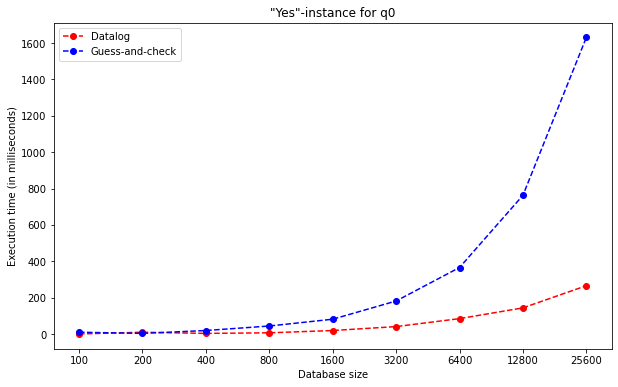

In [29]:
plt.figure(figsize=(10,6))
plt.plot(x, mean_q0_datalog, marker='o', linestyle='--', color='r', label='Datalog') 
plt.plot(x, mean_q0_gac, marker='o', linestyle='--', color='b', label='Guess-and-check') 
plt.xlabel('Database size')
plt.ylabel('Execution time (in milliseconds)') 
plt.xticks(x, size_db)
plt.title('"Yes"-instance for q0')
plt.legend() 
plt.show()

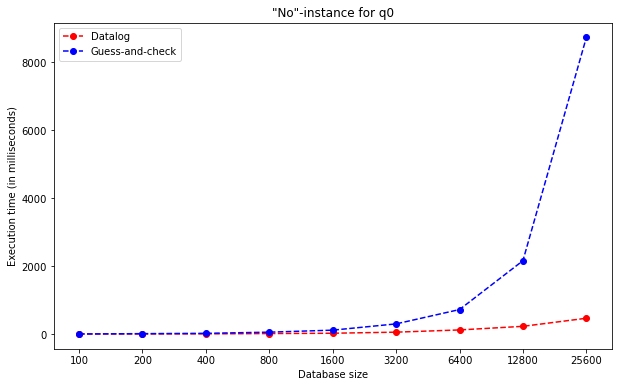

In [30]:
plt.figure(figsize=(10,6))
plt.plot(x, mean_q0c_datalog, marker='o', linestyle='--', color='r', label='Datalog') 
plt.plot(x, mean_q0c_gac, marker='o', linestyle='--', color='b', label='Guess-and-check') 
plt.xlabel('Database size')
plt.ylabel('Execution time (in milliseconds)') 
plt.xticks(x, size_db)
plt.title('"No"-instance for q0')
plt.legend() 
plt.show()

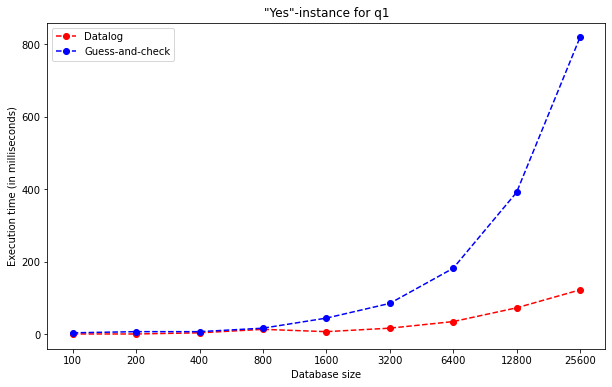

In [31]:
plt.figure(figsize=(10,6))
plt.plot(x, mean_q1_datalog, marker='o', linestyle='--', color='r', label='Datalog') 
plt.plot(x, mean_q1_gac, marker='o', linestyle='--', color='b', label='Guess-and-check') 
plt.xlabel('Database size')
plt.ylabel('Execution time (in milliseconds)') 
plt.xticks(x, size_db)
plt.title('"Yes"-instance for q1')
plt.legend() 
plt.show()

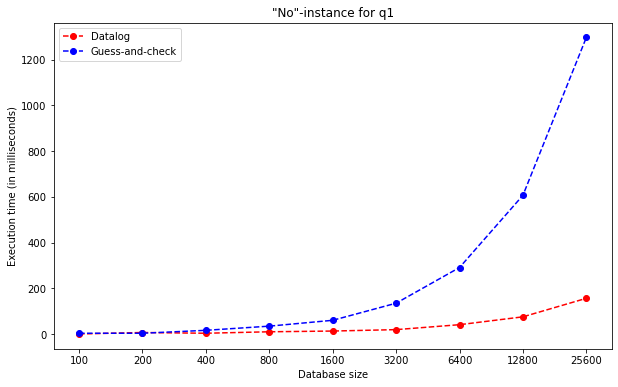

In [32]:
plt.figure(figsize=(10,6))
plt.plot(x, mean_q1c_datalog, marker='o', linestyle='--', color='r', label='Datalog') 
plt.plot(x, mean_q1c_gac, marker='o', linestyle='--', color='b', label='Guess-and-check') 
plt.xlabel('Database size')
plt.ylabel('Execution time (in milliseconds)') 
plt.xticks(x, size_db)
plt.title('"No"-instance for q1')
plt.legend() 
plt.show()

In [ ]:
!clingo q0.db certainty_q0.lp